# Predicting The Survival of Titanic Passengers

### Hanah Chang

## 1. Introduction 

In this project, we are applying logistic regression model on famous Titanic dataset, in order to predict survival of passengers. The datset is from Kaggle and includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

- Target variable: Survived: Survival	(0 = No, 1 = Yes)


## 2. Data & Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
train = pd.read_csv('Train_Titanic.csv')
newdata = pd.read_csv('Test_Titanic.csv')  #newdata has no target variable

In [31]:
# index reset
train.set_index('PassengerId')
newdata.set_index('PassengerId')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [32]:
print(train.shape)
print(newdata.shape)

(891, 12)
(418, 11)


## 3. Methodology

#### a.Explanatory Analysis & Data Cleaning

Let's take a look at % of survived and that of not survived from train dataset. 38.38% of total passengers survived.

In [33]:
print("Total Passengers=", len(train))
print("Percentage Survived =", 1.*len(train[train['Survived']== 1])/len(train)*100.0, "%")
print("Percentage who did not survive =", 1.*len(train[train['Survived']== 0])/len(train)*100.0, "%")      

Total Passengers= 891
Percentage Survived = 38.38383838383838 %
Percentage who did not survive = 61.61616161616161 %


Using simple plots, we are going to visualize key variables such as pclass, sex and Parch  (how many parents onboard)

From bar charts, it seems that passengers who are first class / female / with parents have a higher chance of survival.
Also, from the age histogram we can see that passengers that are young show higher number of survival.

Text(0.5, 1.0, 'Num of Parents')

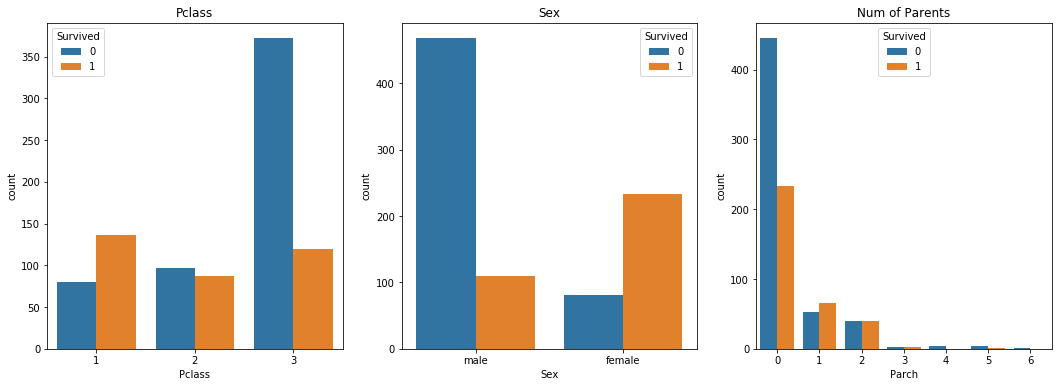

In [34]:
plt.figure(figsize=[18,6])
plt.subplot(131)
sns.countplot(x = 'Pclass', hue = 'Survived', data=train)
plt.title("Pclass")
plt.subplot(132)
sns.countplot(x = 'Sex', hue = 'Survived', data=train)
plt.title("Sex")
plt.subplot(133)
sns.countplot(x = 'Parch', hue = 'Survived', data=train)
plt.title("Num of Parents")

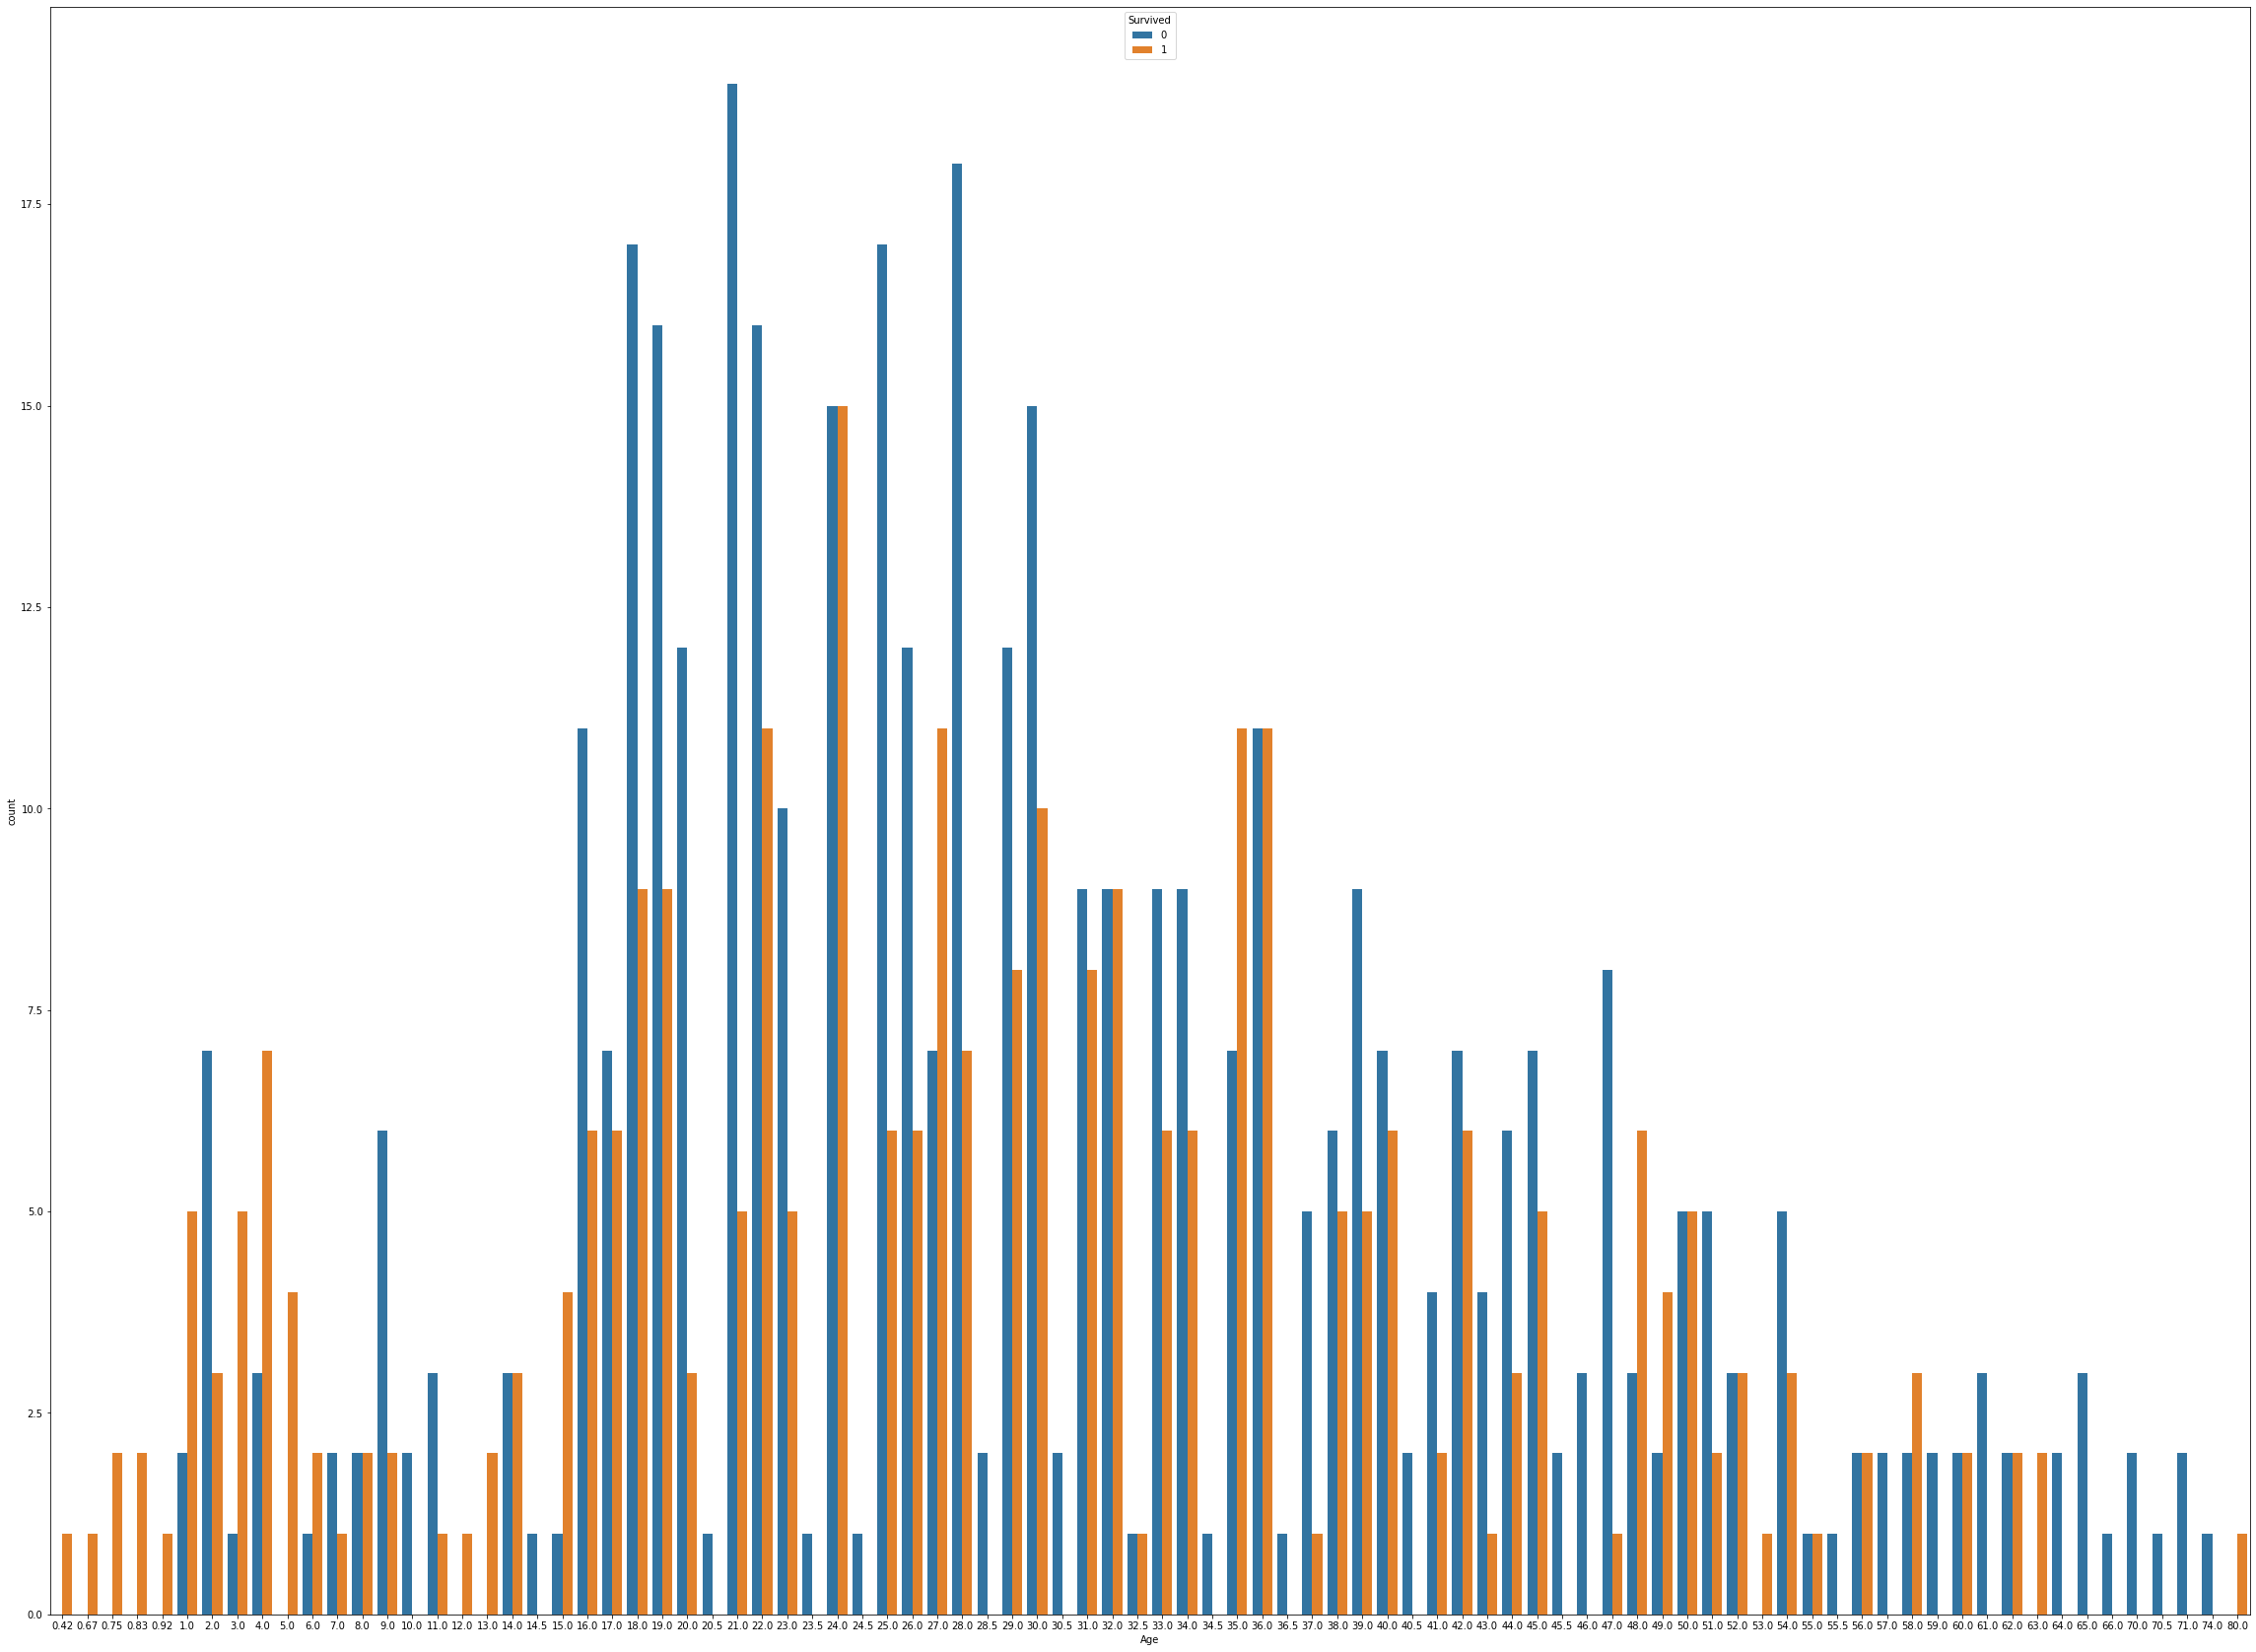

In [35]:
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=train)

Now we are going to drop some columns, which seem to be not relevant to survival chance and going to do some data preperation for modeling. 

In [36]:
train.drop(['Cabin','Name', 'Ticket', 'Embarked'],axis=1,inplace=True)
newdata.drop(['Cabin','Name', 'Ticket', 'Embarked'],axis=1,inplace=True)
train.drop_duplicates() # we find no duplicates. 
newdata.drop_duplicates()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,NaN,0,0,8.0500


In [37]:
# For column Sex, turn categorical values (male, female) into 0,1
for index, row in train.iterrows():
    if row.Sex == 'male':
        train.loc[index,"Male"] = 1
    else :
        train.loc[index,"Male"] = 0
    
for index, row in newdata.iterrows():
    if row.Sex == 'male':
        newdata.loc[index,"Male"] = 1
    else :
        newdata.loc[index,"Male"] = 0

In [38]:
train.drop('Sex', axis =1, inplace =True)
newdata.drop('Sex', axis =1, inplace =True)
print(train.head())
print(newdata.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Male
0            1         0       3  22.0      1      0   7.2500   1.0
1            2         1       1  38.0      1      0  71.2833   0.0
2            3         1       3  26.0      0      0   7.9250   0.0
3            4         1       1  35.0      1      0  53.1000   0.0
4            5         0       3  35.0      0      0   8.0500   1.0
   PassengerId  Pclass   Age  SibSp  Parch     Fare  Male
0          892       3  34.5      0      0   7.8292   1.0
1          893       3  47.0      1      0   7.0000   0.0
2          894       2  62.0      0      0   9.6875   1.0
3          895       3  27.0      0      0   8.6625   1.0
4          896       3  22.0      1      1  12.2875   0.0


In [39]:
# for Age we are going to replace NA with mean group by gender. 
# for Fare we are going to replace NA with mean group by passenger class. 
print(train.info())
print(newdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Male         891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 

In [40]:
train.Age.fillna(train.groupby('Male').Age.transform("mean"), inplace = True)
newdata.Age.fillna(newdata.groupby('Male').Age.transform("mean"), inplace = True)
newdata.Fare.fillna(newdata.groupby('Pclass').Fare.transform("mean"), inplace = True)
print(train.info())
print(newdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Male         891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 

#### b.Logistics Regression

In [41]:
X = train.drop('Survived',axis=1).values
y = train['Survived'].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\hanah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. Results

In [44]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

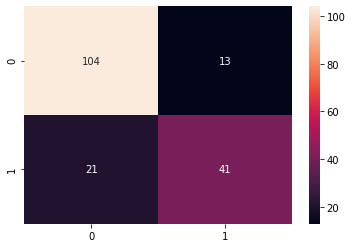

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       117
           1       0.76      0.66      0.71        62

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.81      0.81      0.81       179



Now lets apply our traned model onto newdata. 

In [47]:
y_predict = classifier.predict(newdata)

In [48]:
result = np.array(y_predict)
print ("Total Passengers (from New Data) =", len(newdata))
print ("Survived =", np.count_nonzero(result==0))
print ("Not Survived =", np.count_nonzero(result==1))

Total Passengers (from New Data) = 418
Survived = 254
Not Survived = 164


## 5. Discussion & Conclusion 

From the confusion matirx aboave, we know that our model correctly predicted 145 cases out of total 179 obeservations. That is 
on avaerage, 81% accuracy. Lastly,when new data is given, the model predicted 254 passengers would survive out of total 418 . 